In [221]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(HH)

<module 'HH' from '/home/yaning/Documents/Spiking_NN/HH.py'>

In [222]:
# simulation environment
deltaTms = 0.05
Cm = 1
# other Vm initialisation can lead to random firing
Vm = 1.3458754117369027
# 5000 cycles and every cycle is 0.01ms
# in total 50ms
pointCount = 5000
voltages = np.empty(pointCount)
times = np.arange(pointCount) * deltaTms #record the actual time
stim = np.zeros(pointCount)
# no injection current because the ampa current will be the injection current
stim[1500:4000] = 0  # create a square pulse

# presynapse firing
first_pre_firing = list(range(500, 521)) 
second_pre_firing = list(range(1500, 2000))
tsp_pre = first_pre_firing + second_pre_firing


In [223]:
tsp_pre

[500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,
 1604,
 1605,
 1606,
 1607,
 1608,
 1609,
 1610,
 1611,
 1612,
 1613,
 1614,
 1615,
 1616,
 1617,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,

In [224]:
sodium_channel = HH.Voltage_Sodium(Vm)
potassium_channel = HH.Voltage_Potassium(Vm)
leaky_channel = HH.Voltage_Leak(Vm)

# because I am using factory, so the initialised values stay the same
# even the below line runs again
ampa_receptor = HH.LigandGatedChannelFactory.create_AMPA(Vm)

na_currents = []
k_currents = []
leak_currents = []
ampa_currents = []
ampa_gps = []

include_ampa = 1

for i in range(len(times)):

    sodium_channel.update_gP(deltaTms)
    potassium_channel.update_gP(deltaTms)

    if include_ampa:
        ampa_receptor.update_gP(i, deltaTms, tsp_pre)
    ampa_gps.append(ampa_receptor.gP)
    # # get the currents
    # INa = sodium_channel.current()
    # IK = potassium_channel.current()
    # Ileak = leaky_channel.current()

    # if include_ampa:
    #     Iampa = ampa_receptor.current()
    #     ampa_currents.append(Iampa)

    try:
        # get the currents
        INa = sodium_channel.current()
        IK = potassium_channel.current()
        Ileak = leaky_channel.current()

        if include_ampa:
            Iampa = ampa_receptor.current()
            ampa_currents.append(Iampa)
        else:
            Iampa = 1
        

        # check for over or underflow
        if any(current > 1e10 for current in [INa, IK, Ileak, Iampa]):
            raise OverflowError("overflowed")
        
    except OverflowError as m:
        print(f"error: {m}")
        break

    threshold = 1e-10  # Define your underflow threshold

    # Replace underflowing currents with 0
    INa = INa if abs(INa) >= threshold else 0
    IK = IK if abs(IK) >= threshold else 0
    Ileak = Ileak if abs(Ileak) >= threshold else 0
    Iampa = Iampa if abs(Iampa) >= threshold else 0


    na_currents.append(INa)
    k_currents.append(IK)
    leak_currents.append(Ileak)

    
    # print(f"time is {i}")
    print(f"INa is {INa}")
    print(f"IK is {IK}")
    print(f"Ileak is {Ileak}")
    if include_ampa:
        print(f"Iampa is {Iampa}")
    
    print("\n")

    # sum the currents
    if include_ampa:
        Isum = stim[i] - INa - IK - Ileak -Iampa
    else:
        Isum = stim[i] - INa - IK - Ileak 

    Vm += deltaTms * Isum / Cm

    voltages[i] = Vm

    # update the voltages for each channel
    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm

    if include_ampa:
        ampa_receptor.Vm = Vm

        # when post synaptic fires weight updates
        if i >= 2:
            if voltages[i-2] <= voltages[i-1] and voltages[i-1] >= voltages[i]:
                ampa_receptor.update_w(i)
                print(f"this is activated at {i}")




this line runs
this line runs
this line runs
0.2451603494963966
this line runs
this line runs
this line runs
0.2451603494963966
this line runs
this line runs
this line runs
0.2451603494963966
e is 0.9950822916666666
INa is -1.778814622592443
IK is 6.306995075638527
Ileak is -2.7762373764789285
Iampa is -0.0010611472339358983


e is 0.9998790807237413
INa is -1.7695413505069582
IK is 6.264686075673016
Ileak is -2.802500605418927
Iampa is -0.0018193139179025514


e is 0.9999970267713374
INa is -1.7521649653309097
IK is 6.222920142970105
Ileak is -2.8278629775063657
Iampa is -0.0023368031093251597


e is 0.9999999268926432
INa is -1.7287816076462725
IK is 6.181519664481623
Ileak is -2.8524713084617184
Iampa is -0.002663424662695888


e is 0.9999999982023967
INa is -1.7010591720993389
IK is 6.140359552457942
Ileak is -2.8764353583173823
Iampa is -0.0028392635817825742


e is 0.9999999999557996
INa is -1.6703102730967825
IK is 6.099356168292225
Ileak is -2.8998357446942737
Iampa is -0.00289

In [225]:
HH.LigandGatedChannelFactory.gMax_AMPA

0.0072

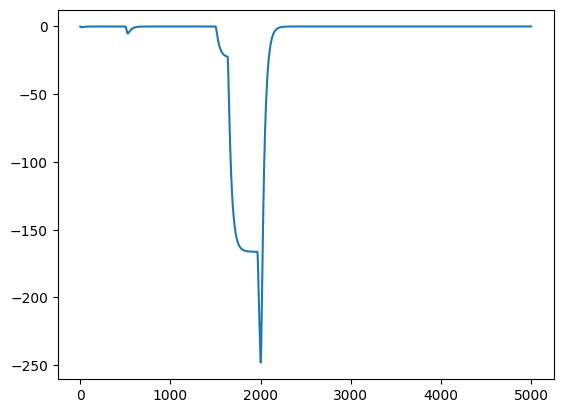

In [226]:
plt.plot(ampa_gps , label="leaky")

In [227]:
ampa_gps

[-0.10950609468277106,
 -0.200807597753625,
 -0.2765025828082074,
 -0.3388284155843422,
 -0.3897115572657116,
 -0.4308104991725277,
 -0.46355277590223676,
 -0.4891668734059186,
 -0.5087097359119923,
 -0.5230904785559122,
 -0.5330908289027698,
 -0.5393827484141882,
 -0.5425436227210474,
 -0.5430693559481651,
 -0.5413856581138665,
 -0.5378577747772314,
 -0.5327988737499992,
 -0.5264772740711382,
 -0.5191226769068381,
 -0.5109315360241303,
 -0.5020716865070616,
 -0.4926863340218557,
 -0.48289749283100936,
 -0.4728089485947275,
 -0.46250881151336454,
 -0.45207171632539694,
 -0.44156071788261075,
 -0.43102892430580264,
 -0.42052090393222913,
 -0.4100738972725756,
 -0.39971886089024977,
 -0.3894813664044066,
 -0.3793823746184416,
 -0.369438902017196,
 -0.35966459449797145,
 -0.3500702211502115,
 -0.34066409913116286,
 -0.33145245916100635,
 -0.32243975984723683,
 -0.31362895791550977,
 -0.3050217404477767,
 -0.2966187243867779,
 -0.2884196278402774,
 -0.2804234170928124,
 -0.2726284326933905

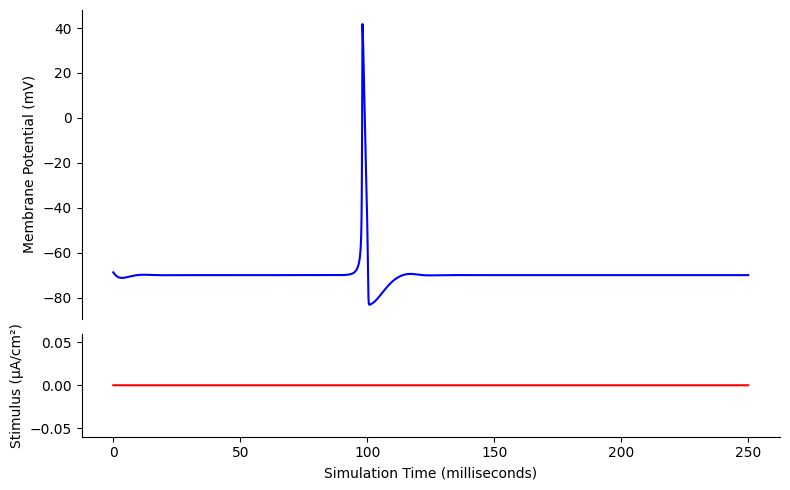

In [228]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("dev/concept4.png")
plt.show()

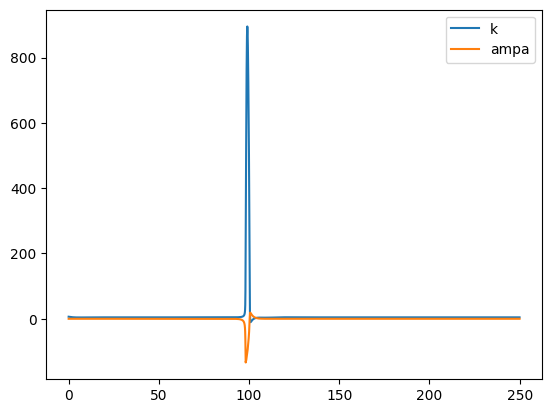

In [232]:
# plt.plot(times, leak_currents, label="leaky")
plt.plot(times, k_currents, label="k")
# plt.plot(times, na_currents, label="na")
plt.plot(times, ampa_currents, label="ampa")
plt.legend()